In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
class LinReg:
    def __init__(self,**kwargs):
        self.x = None
        self.y = None
        if "x" in kwargs:
            self.x = kwargs["x"]
        if "y" in kwargs:
            self.y = kwargs["y"]
        
    def set_x(self,_x):
        self.x = _x
        
    def set_y(self, _y):
        self.y = _y
        
    def d(self,a,b):
        c = []
        for v in a:
            c.append(v-b)
        return c
        
    def lin_func(self,m,c):
        return [(m*a)+c  for a in self.x]
    
    def gen(self, **kwargs):
        if self.x is not None:
            _x = self.x
        elif "x" in kwargs:
            _x = kwargs["x"]
            self.set_x(_x)
        else:
            raise RuntimeError("Specify independent variable.")
            
        if self.y is not None:
            _y = self.y
        elif "y" in kwargs:
            _y = kwargs["y"]
            self.set_y(_y)
        else:
            raise RuntimeError("Specify dependent variable.")
            
        mean_x = np.mean(_x)
        mean_y = np.mean(_y)
            
        self.mean_x = mean_x
        self.mean_y = mean_y
        
        self.sig_x_mean_x = sum(self.d(_x,mean_x))
        self.sig_y_mean_y = sum(self.d(_y,mean_y))
        
        num = sum([a+b for a,b in zip(self.d(_x,mean_x),self.d(_y,mean_y))])
        dnum = sum([a**2 for a in self.d(_x,mean_x)])
        
        self.m = num/dnum
        self.c = mean_y - (self.m*mean_x)
        
        m = self.m 
        c = self.c 
        
        self.pred_y = [(m*a)+c  for a in _x]
        
    def r2(self):
        num = sum([a**2 for a in self.d(self.y, self.mean_y)])
        dnum = sum([(a-b)**2 for a,b in zip(self.pred_y, self.y)])
        
        return 1 - (num/dnum)
    
    def slope_cor(self):
        self.uncor_m = self.m
        self.uncha_pred_y = self.pred_y
        m = 0
        r_score = []
        go_on = True
        
        ### create condition for determining increasing or decreasing slope ! use of m+=1 or m-=1
        while(go_on):
            c = self.mean_y - (m*self.mean_x)
            self.pred_y = self.lin_func(m,c)
            r = self.r2()
            r_score.append(r)
            if r <= max(r_score) and r_score.index(r) > r_score.index(max(r_score)):
                go_on = False
            else:
                m+=1
                
        self.m = m
        
    def show(self):
        plt.plot(self.x, self.pred_y, color='b', label='Predicted line')
        plt.scatter(self.x,self.y, color='k', label = 'Actual values')
        
        plt.legend()
        plt.show()
        print(self.d(self.y,self.mean_y))

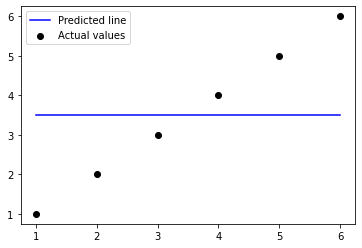

[2.5, 1.5, 0.5, -0.5, -1.5, -2.5]


In [12]:
x_val = [6, 5, 4, 3, 2,1]
y_val = [6,5,4,3,2,1 ]
l1 = LinReg(x = x_val, y = y_val)
l1.gen()
l1.r2()
#original regression line
l1.show()


<ipython-input-11-c224cf707ed4>:66: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - (num/dnum)


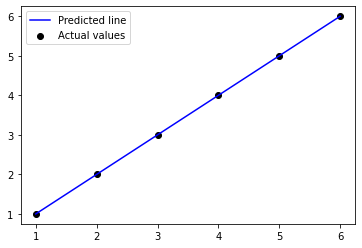

[2.5, 1.5, 0.5, -0.5, -1.5, -2.5]


In [13]:
#corrected regression line
l1.slope_cor() # this corrects the linear equation for the relationship btw the data set and corrects the prediction formula
l1.show()